In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# our results

replication_results = pd.read_csv('results.csv', index_col=0, )
replication_results.reset_index(inplace=True)
#replication_results.drop(columns=['index'], inplace=True)
replication_results['experiment'] = 'replication_results'
replication_results
replication_results.columns = ['simulation', 'N', 'TRF', 'SRF', 'XRF_True', 'XRF', 'experiment']
replication_results = pd.melt(replication_results, id_vars=['experiment', 'simulation', 'N'],
                              value_vars=['XRF', 'SRF', 'TRF', 'XRF_True'], 
                              var_name='metalearner', 
                              value_name='mse')

# replication_results.columns = [str(col) for col in replication_results.columns[0:2]]+\
#                             [str(col) + '_replication' for col in replication_results.columns[2:]]

In [4]:
# author results

# initialize master df
author_repo_results=pd.DataFrame()

# set up dictionary that maps our sim names to author repo sim names
sim_dict = {'simA':'unbalanced_treatment',
          'simB':'complex_linear',
          'simC': 'complex_nonlinear',
          'simD': 'beta_confounded'}

# reach in each sim from author repo and concatenate so schema is the same as our results df
for sim_letter, sim_description in sim_dict.items():
    url = 'https://raw.githubusercontent.com/theo-s/metalearners-reproduction/main/code/Appendix/results/'+sim_description+'EMSE.csv'
    df = pd.read_csv(url)
    
    # add our sim name
    df['simulation'] = sim_letter
    
    # drop BART columns since we did not use that base learner
    cols = [c for c in df.columns if c[1:] != 'BART']
    df = df[cols]
    
    # append each sim to master df
    author_repo_results = pd.concat([author_repo_results, df])
    author_repo_results['experiment'] = 'author_results'
    
author_repo_results = pd.melt(author_repo_results, id_vars=['experiment', 'simulation', 'N'],
                              value_vars=['XRF', 'SRF', 'TRF'], 
                              var_name='metalearner', 
                              value_name='mse')
     
# author_repo_results.columns = [str(author_repo_results.columns[0]).lower()]+\
#                          [str(col) + '_replication' for col in author_repo_results.columns[1:4]]+\
#                         [author_repo_results.columns[4]]
    

In [5]:
# all results
#results = author_repo_results.merge(replication_results, on=['n', 'simulation'], how='left')
results = pd.concat([replication_results, author_repo_results])

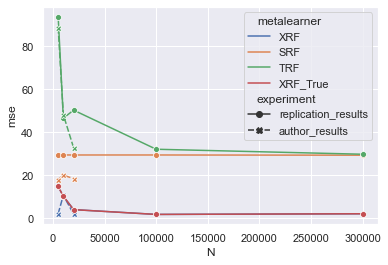

In [6]:
sns.lineplot(data=results[results.simulation=='simA'], x="N", y="mse", 
             hue="metalearner", style="experiment",  markers=True)
plt.show()

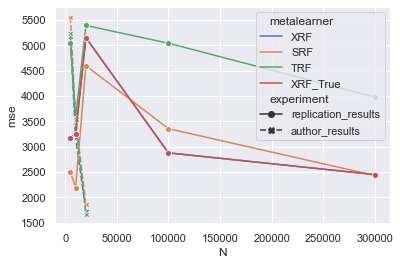

In [7]:
sns.lineplot(data=results[results.simulation=='simB'], x="N", y="mse", 
             hue="metalearner", style="experiment",  markers=True)
plt.show()

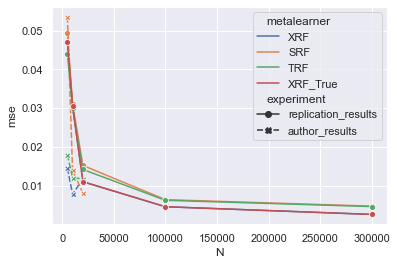

In [8]:
sns.lineplot(data=results[results.simulation=='simC'], x="N", y="mse", 
             hue="metalearner", style="experiment",  markers=True)
plt.show()

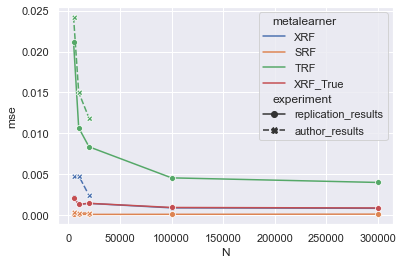

In [9]:
sns.lineplot(data=results[results.simulation=='simD'], x="N", y="mse", 
             hue="metalearner", style="experiment",  markers=True)
plt.show()

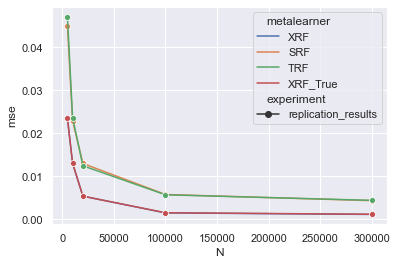

In [10]:
sns.lineplot(data=results[results.simulation=='simE'], x="N", y="mse", 
             hue="metalearner", style="experiment",  markers=True)
plt.show()

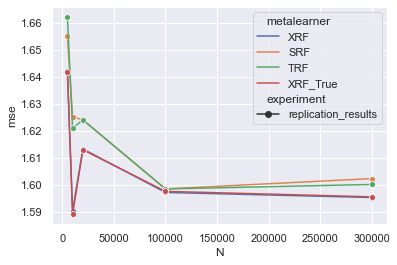

In [11]:
sns.lineplot(data=results[results.simulation=='simF'], x="N", y="mse", 
             hue="metalearner", style="experiment",  markers=True)
plt.show()